In [87]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('expand_frame_repr', False)


In [112]:
stock_data = pd.read_csv('D:\邢不行量化投资\系列19：10年翻400倍的策略\stock_data.csv',  engine='python',
                         encoding='gbk')  # 此处填入数据在本地的路径

In [113]:
stock_data['交易日期'] = pd.to_datetime(stock_data['交易日期'])
stock_data.sort_values(by = ['交易日期','股票代码'], inplace =  True)
stock_data = stock_data[stock_data['交易日期'] > pd.to_datetime('20060130')]
stock_data = stock_data[stock_data['是否交易'] != 0]
stock_data = stock_data[stock_data['交易天数'] >= 10]
stock_data = stock_data[stock_data['最后一天涨跌幅'] <= 0.097]
output = pd.DataFrame()
output['所有股票下月涨幅'] = stock_data.groupby('交易日期')['下月涨幅'].mean()
stock_data['市值_排名'] = stock_data.groupby('交易日期')['总市值'].rank()
stock_data = stock_data[stock_data['市值_排名'] <= 10]
output['选中股票下月涨幅'] = stock_data.groupby('交易日期')['下月涨幅'].mean()
print(stock_data)
print(output)

             交易日期      股票代码           总市值  是否交易   最后一天涨跌幅  交易天数      下月涨幅  市值_排名
26288  2006-01-31  sh600137  1.712058e+08     1 -0.037543    16  0.042551    7.0
44887  2006-01-31  sh600234  1.670708e+08     1 -0.011111    16  0.005618    6.0
54133  2006-01-31  sh600286  1.128600e+08     1  0.010204    16  0.252526    1.0
126774 2006-01-31  sh600691  1.785041e+08     1 -0.037500    16  0.056279    8.0
144673 2006-01-31  sh600762  1.394765e+08     1 -0.050360    15  0.143939    3.0
179005 2006-01-31  sh600892  1.908900e+08     1  0.010695    16  0.015875   10.0
221798 2006-01-31  sz000156  1.476450e+08     1 -0.049689    16  0.124185    5.0
260878 2006-01-31  sz000622  1.459943e+08     1 -0.019048    16  0.796116    4.0
282835 2006-01-31  sz000736  1.801800e+08     1  0.018657    16 -0.010989    9.0
294175 2006-01-31  sz000805  1.378960e+08     1  0.029915    15  0.041497    2.0
26289  2006-02-28  sh600137  1.784912e+08     1  0.020833    16  0.061225    7.0
44888  2006-02-28  sh600234 

In [114]:
stock_data['股票代码'] += ' '

In [115]:
output['股票代码'] = stock_data.groupby('交易日期')['股票代码'].sum()

In [116]:
output['line_benchmark'] = (output['所有股票下月涨幅'] + 1).cumprod()

In [117]:
output['line'] = (output['选中股票下月涨幅'] + 1).cumprod()

In [118]:
print(output)

            所有股票下月涨幅  选中股票下月涨幅                                               股票代码  line_benchmark        line
交易日期                                                                                                         
2006-01-31  0.033013  0.146760  sh600137 sh600234 sh600286 sh600691 sh600762 s...        1.033013    1.146760
2006-02-28  0.006364 -0.048156  sh600137 sh600234 sh600286 sh600691 sh600762 s...        1.039587    1.091536
2006-03-31  0.070087 -0.087006  sh600137 sh600234 sh600286 sh600629 sh600691 s...        1.112449    0.996566
2006-04-30  0.252339  0.167668  sh600137 sh600234 sh600286 sh600691 sh600745 s...        1.393162    1.163659
2006-05-31  0.057922  0.112699  sh600137 sh600234 sh600691 sh600711 sh600745 s...        1.473858    1.294802
2006-06-30 -0.036124  0.056081  sh600137 sh600242 sh600385 sh600419 sh600691 s...        1.420616    1.367415
2006-07-31  0.033913 -0.034218  sh600234 sh600242 sh600419 sh600691 sh600703 s...        1.468793    1.320625
2006-08-31

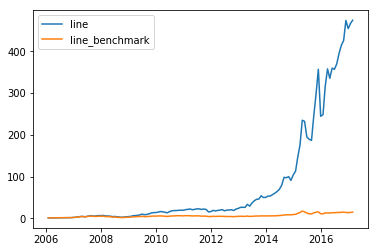

In [119]:
plt.plot(output['line'])
plt.plot(output['line_benchmark'])
plt.legend(loc='best')
plt.show()